In [33]:
import os

In [34]:
os.getcwd()

'/content/drive/My Drive/Colab_Notebooks/data'

In [35]:
os.chdir('/content/drive/MyDrive/Colab_Notebooks/data')
os.getcwd()

'/content/drive/MyDrive/Colab_Notebooks/data'

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
train = pd.read_csv('train_new.csv')

In [38]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7561 non-null   int64 
 1   keyword   7500 non-null   object
 2   location  5061 non-null   object
 3   text      7561 non-null   object
 4   target    7561 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 295.5+ KB


In [40]:
import seaborn as sns
sns.set(style="white")

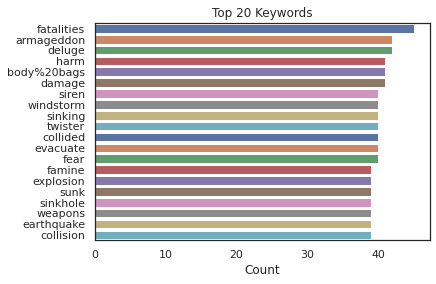

In [41]:
keywords_vc = pd.DataFrame({"Count": train["keyword"].value_counts()})
sns.barplot(y=keywords_vc[0:20].index, x=keywords_vc[0:20]["Count"],palette="deep")
plt.title("Top 20 Keywords")
plt.show()

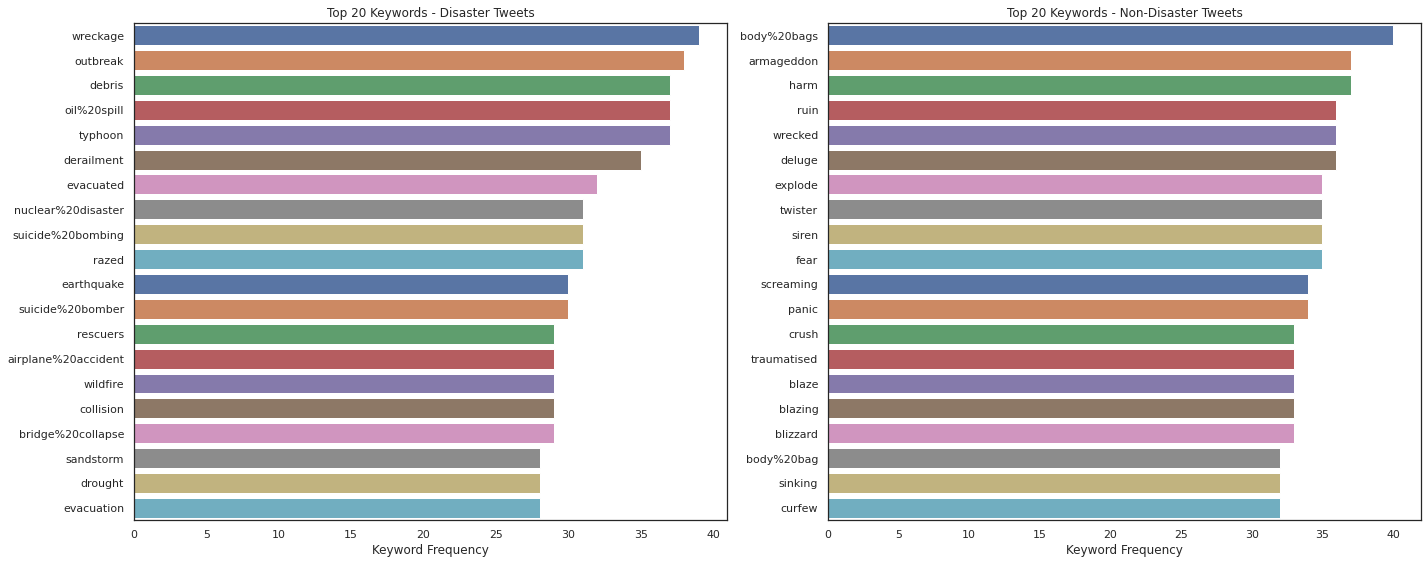

In [42]:
disaster_keywords = train.loc[train["target"] == 1]["keyword"].value_counts()
nondisaster_keywords = train.loc[train["target"] == 0]["keyword"].value_counts()

fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot(y=disaster_keywords[0:20].index, x=disaster_keywords[0:20], orient='h', ax=ax[0], palette="deep")
sns.barplot(y=nondisaster_keywords[0:20].index, x=nondisaster_keywords[0:20], orient='h', ax=ax[1], palette="deep")
ax[0].set_title("Top 20 Keywords - Disaster Tweets")
ax[0].set_xlabel("Keyword Frequency")
ax[1].set_title("Top 20 Keywords - Non-Disaster Tweets")
ax[1].set_xlabel("Keyword Frequency")
plt.tight_layout()
plt.show()

# 关键词可能性分析


In [49]:
def keyword_disaster_probabilities(x):
    tweets_w_keyword = np.sum(train["keyword"].fillna("").str.contains(x))
    tweets_w_keyword_disaster = np.sum(train["keyword"].fillna("").str.contains(x) & train["target"] == 1)
    return tweets_w_keyword_disaster / tweets_w_keyword

keywords_vc["Disaster_Probability"] = keywords_vc.index.map(keyword_disaster_probabilities)
keywords_vc.head(10)

,Count,Disaster_Probability
fatalities,45,0.577778
armageddon,42,0.119048
deluge,42,0.188406
harm,41,0.097561
body%20bags,41,0.024390
damage,41,0.463415
siren,40,0.173913
windstorm,40,0.400000
sinking,40,0.200000
twister,40,0.125000


In [50]:
keywords_vc.sort_values(by="Disaster_Probability", ascending=False).head(10)

,Count,Disaster_Probability
derailment,35,1.000000
debris,37,1.000000
wreckage,39,1.000000
outbreak,39,0.974359
typhoon,38,0.973684
oil%20spill,38,0.973684
suicide%20bombing,32,0.968750
suicide%20bomber,31,0.967742
bombing,29,0.950820
suicide%20bomb,30,0.946237


In [51]:
keywords_vc.sort_values(by="Disaster_Probability").head(10)

,Count,Disaster_Probability
aftershock,32,0.000000
body%20bags,41,0.024390
ruin,37,0.027027
blazing,34,0.029412
screaming,36,0.055556
traumatised,35,0.057143
blew%20up,33,0.060606
panicking,33,0.060606
blight,32,0.062500
body%20bag,33,0.065421


In [44]:
wreckage_tweets = train[(train["keyword"].fillna("").str.contains("wreckage")) & (train["target"] == 1)]
print("An example tweet:\n", wreckage_tweets.iloc[10, 3])
wreckage_tweets.head()

An example tweet:
 Malaysia PM confirms wreckage belongs to MH370 http://t.co/kacrlpjC0l http://t.co/YjJbNTcaZY


,id,keyword,location,text,target
7453,10735,wreckage,Mumbai,Wreckage 'Conclusively Confirmed' as From MH37...,1
7454,10736,wreckage,Tokyo,Wreckage Confirmed As Part of Missing Malaysia...,1
7455,10737,wreckage,NaN,Wreckage 'Conclusively Confirmed' as From MH37...,1
7456,10739,wreckage,Sydney,MH370 victim's family furious the media was to...,1
7457,10741,wreckage,NaN,Wreckage 'Conclusively Confirmed' as From MH37...,1


In [45]:
aftershock_tweets = train[(train["keyword"].fillna("").str.contains("aftershock")) & (train["target"] == 0)]
print("An example tweet:\n", aftershock_tweets.iloc[10, 3])
aftershock_tweets.head()

An example tweet:
 Aftershock was the most terrifying best roller coaster I've ever been on. *DISCLAIMER* I've been on very few.


,id,keyword,location,text,target
101,146,aftershock,Instagram - @heyimginog,@afterShock_DeLo scuf ps live and the game... cya,0
102,149,aftershock,304,'The man who can drive himself further once th...,0
103,151,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yN...,0
104,153,aftershock,304,'There is no victory at bargain basement price...,0
105,156,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0


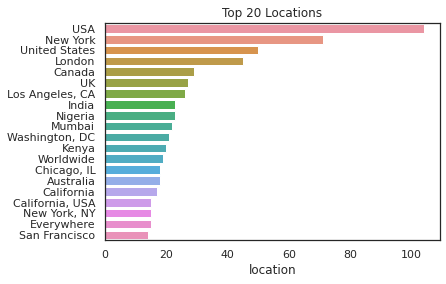

In [46]:
locations_vc = train["location"].value_counts()
sns.barplot(y=locations_vc[0:20].index, x=locations_vc[0:20], orient='h')
plt.title("Top 20 Locations")
plt.show()

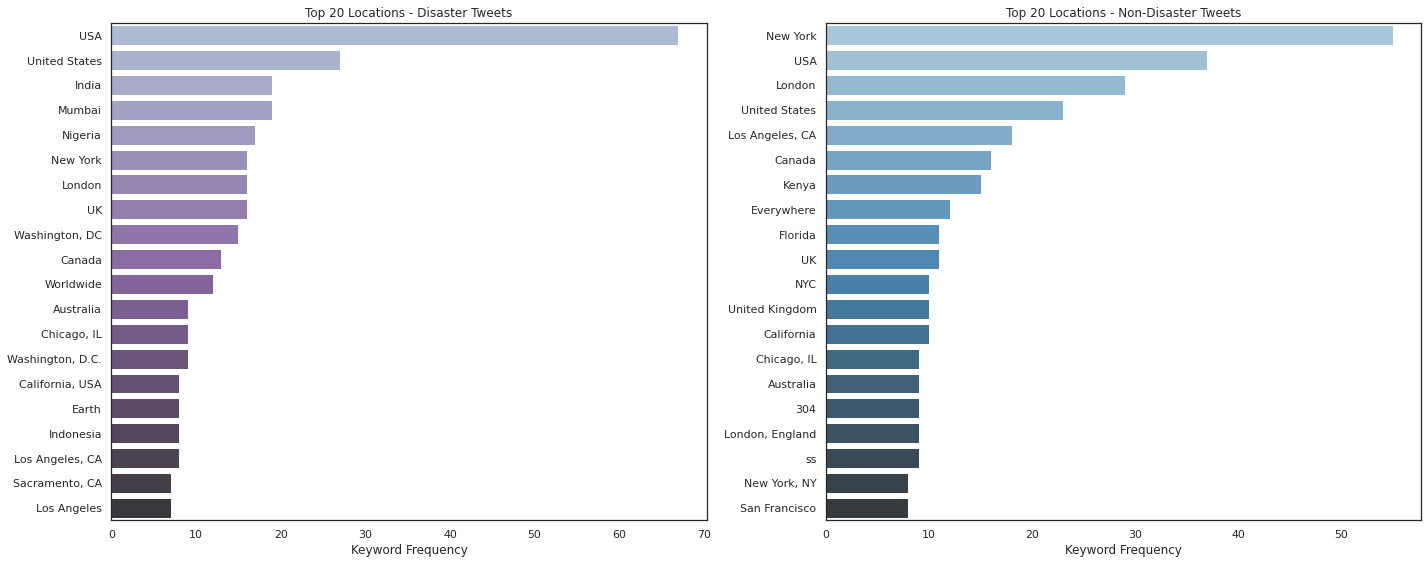

In [47]:
disaster_locations = train.loc[train["target"] == 1]["location"].value_counts()
nondisaster_locations = train.loc[train["target"] == 0]["location"].value_counts()

fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot(y=disaster_locations[0:20].index, x=disaster_locations[0:20], orient='h', ax=ax[0], palette="BuPu_d")
sns.barplot(y=nondisaster_locations[0:20].index, x=nondisaster_locations[0:20], orient='h', ax=ax[1], palette="Blues_d")
ax[0].set_title("Top 20 Locations - Disaster Tweets")
ax[0].set_xlabel("Keyword Frequency")
ax[1].set_title("Top 20 Locations - Non-Disaster Tweets")
ax[1].set_xlabel("Keyword Frequency")
plt.tight_layout()
plt.show()

Not Disaster: 57.16%, Disaster: 42.84%


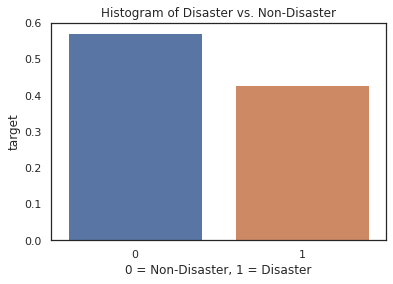

In [48]:
target_vc = train["target"].value_counts(normalize=True)
print("Not Disaster: {:.2%}, Disaster: {:.2%}".format(target_vc[0], target_vc[1]))
sns.barplot(x=target_vc.index, y=target_vc)
plt.title("Histogram of Disaster vs. Non-Disaster")
plt.xlabel("0 = Non-Disaster, 1 = Disaster")
plt.show()